In [14]:
# lipid_lnp_dataset_generator.py

import numpy as np
import pandas as pd
import random

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# Feature ranges
# Assume percentage of each lipid component
ionizable_range = (30, 60)    # 30-60%
helper_lipid_range = (20, 40) # 20-40%
peg_lipid_range = (1, 10)     # 1-10%
phospholipid_range = (5, 25)  # 5-25%

data = []

for _ in range(n_samples):
    ionizable = np.random.uniform(*ionizable_range)
    helper = np.random.uniform(*helper_lipid_range)
    peg = np.random.uniform(*peg_lipid_range)
    phospholipid = np.random.uniform(*phospholipid_range)

    total = ionizable + helper + peg + phospholipid

    # Normalize to 100%
    ionizable = (ionizable / total) * 100
    helper = (helper / total) * 100
    peg = (peg / total) * 100
    phospholipid = (phospholipid / total) * 100

    # Simple synthetic formula for size (in nm)
    size = (120 - 0.8 * peg + 0.3 * helper - 0.2 * phospholipid 
           + np.random.normal(0, 5))  # Adding noise

    data.append([ionizable, helper, peg, phospholipid, size])

# Create dataframe
columns = ['Ionizable_Lipid_%', 'Helper_Lipid_%', 'PEG_Lipid_%', 'Phospholipid_%', 'LNP_Size_nm']
df = pd.DataFrame(data, columns=columns)

# Save to CSV
df.to_csv('synthetic_lnp_dataset.csv', index=False)

print("Synthetic dataset created and saved as 'synthetic_lnp_dataset.csv'!")


Synthetic dataset created and saved as 'synthetic_lnp_dataset.csv'!


In [2]:
import pandas as pd
df = pd.read_csv('synthetic_lnp_dataset.csv')

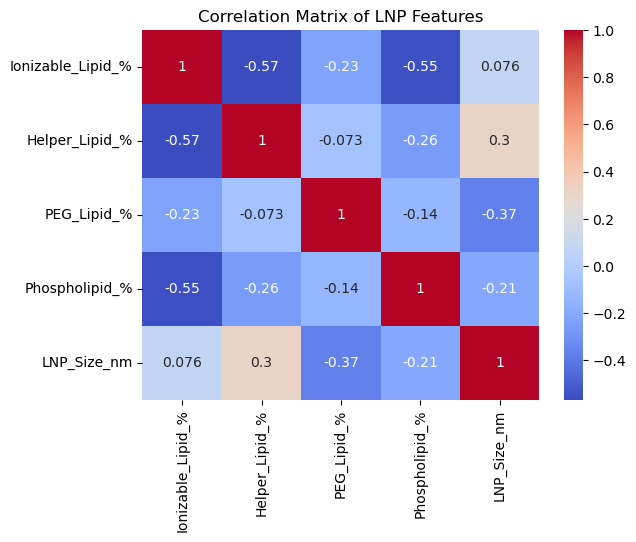

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of LNP Features')
plt.show()


In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('LNP_Size_nm', axis=1)
y = df['LNP_Size_nm']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [10]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"R²: {r2:.3f}, RMSE: {rmse:.2f} nm")


R²: 0.238, RMSE: 4.95 nm


C:\Users\chard\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


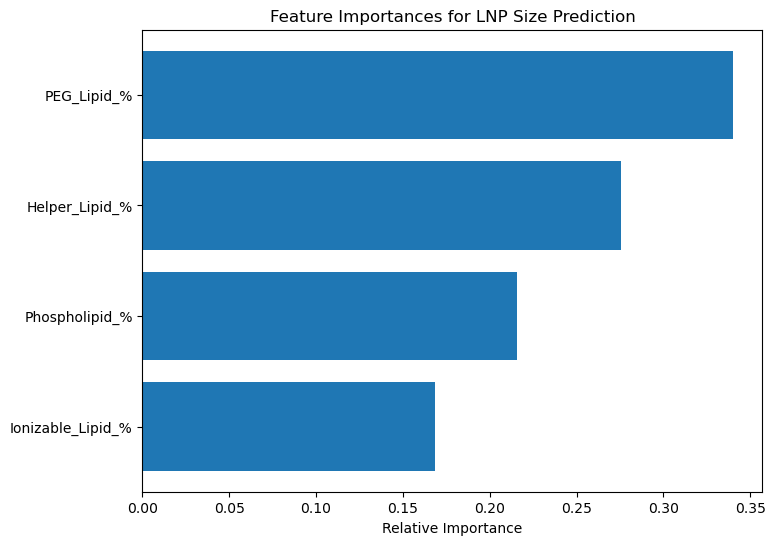

In [16]:
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.title('Feature Importances for LNP Size Prediction')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True)
X_poly = poly.fit_transform(X)


In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)


{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [24]:
!pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 109.3 kB/s eta 0:22:

In [30]:
np.random.normal(0, 5)


-5.643104120642941

In [34]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)


In [36]:
model = XGBRegressor(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    random_state=42
)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [38]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 500

# Feature ranges
ionizable_range = (30, 60)
helper_lipid_range = (20, 40)
peg_lipid_range = (1, 10)
phospholipid_range = (5, 25)

data = []

for _ in range(n_samples):
    ionizable = np.random.uniform(*ionizable_range)
    helper = np.random.uniform(*helper_lipid_range)
    peg = np.random.uniform(*peg_lipid_range)
    phospholipid = np.random.uniform(*phospholipid_range)

    total = ionizable + helper + peg + phospholipid

    # Normalize to 100%
    ionizable = (ionizable / total) * 100
    helper = (helper / total) * 100
    peg = (peg / total) * 100
    phospholipid = (phospholipid / total) * 100

    # **LESS noise added now** (std dev = 2)
    size = (120 - 0.8 * peg + 0.3 * helper - 0.2 * phospholipid 
           + np.random.normal(0, 2))

    data.append([ionizable, helper, peg, phospholipid, size])

# Create dataframe
columns = ['Ionizable_Lipid_%', 'Helper_Lipid_%', 'PEG_Lipid_%', 'Phospholipid_%', 'LNP_Size_nm']
df = pd.DataFrame(data, columns=columns)

# Save to CSV
df.to_csv('synthetic_lnp_dataset_clean.csv', index=False)

print("New cleaner synthetic dataset saved as 'synthetic_lnp_dataset_clean.csv'!")


New cleaner synthetic dataset saved as 'synthetic_lnp_dataset_clean.csv'!


In [40]:
df = pd.read_csv('synthetic_lnp_dataset_clean.csv')
X = df.drop('LNP_Size_nm', axis=1)
y = df['LNP_Size_nm']


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300, max_depth=10, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

In [46]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RandomForest Model -> R²: {r2:.3f}, RMSE: {rmse:.2f} nm")


RandomForest Model -> R²: 0.697, RMSE: 2.05 nm


C:\Users\chard\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(
    n_estimators=300,  # Number of trees
    max_depth=5,       # How deep each tree can grow
    learning_rate=0.1, # How fast to learn
    subsample=0.8,     # Randomly select a part of data for training
    random_state=42
)

xgb_model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [53]:
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)
print(f"XGBoost Model -> R²: {r2_xgb:.3f}, RMSE: {rmse_xgb:.2f} nm")

XGBoost Model -> R²: 0.651, RMSE: 2.20 nm


C:\Users\chard\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [55]:
from sklearn.preprocessing import PolynomialFeatures

# Create interaction terms only (no squares)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

print(f"New feature set shape: {X_poly.shape}")


New feature set shape: (500, 10)


In [57]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

# Define parameter search space
param_dist = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up randomized search
xgb = XGBRegressor(random_state=42)
random_search = RandomizedSearchCV(
    xgb, 
    param_distributions=param_dist,
    n_iter=20,         # Try 20 random combinations
    scoring='r2',      # Maximize R²
    cv=5,              # 5-fold cross-validation
    verbose=1,
    random_state=42
)

# Run it
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [59]:
y_pred_best = best_xgb.predict(X_test)
r2_best = r2_score(y_test, y_pred_best)
rmse_best = mean_squared_error(y_test, y_pred_best, squared=False)

print(f"Tuned XGBoost Model -> R²: {r2_best:.3f}, RMSE: {rmse_best:.2f} nm")


Tuned XGBoost Model -> R²: 0.701, RMSE: 2.03 nm


C:\Users\chard\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Get feature importances
importances = best_xgb.feature_importances_

# Step 2: Get feature names
# If you used PolynomialFeatures, the new feature names aren't directly visible
# But you can manually reconstruct them from the original columns

original_features = list(X.columns)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly.fit(X)


PolynomialFeatures(include_bias=False, interaction_only=True)

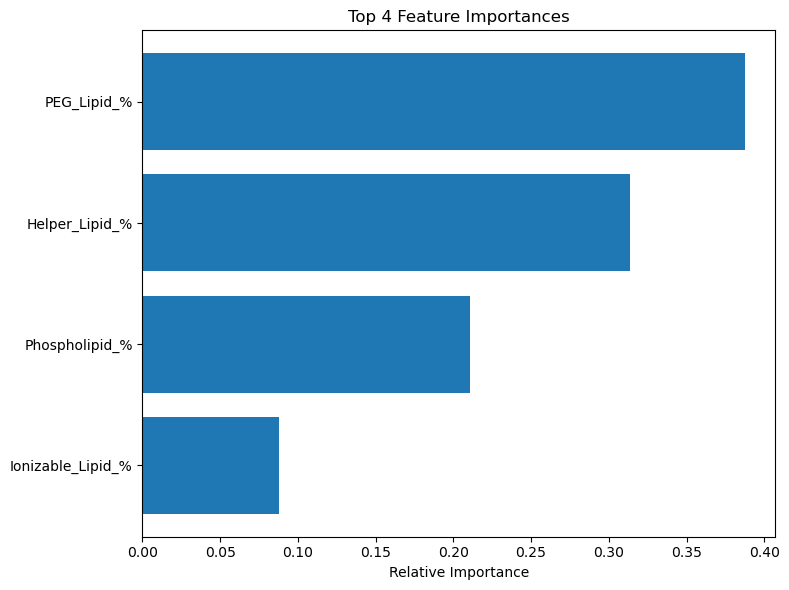

In [67]:
# Step 1: Rebuild feature names
from sklearn.preprocessing import PolynomialFeatures

original_features = list(X.columns)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly.fit(X)
interaction_feature_names = poly.get_feature_names_out(original_features)

# Step 2: Get important features
important_indices = np.where(importances > 0)[0]
important_importances = importances[important_indices]
important_feature_names = [interaction_feature_names[i] for i in important_indices]
sorted_idx = np.argsort(important_importances)

# Step 3: Plot top features
top_n = min(10, len(sorted_idx))
top_indices = sorted_idx[-top_n:]

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
plt.title(f'Top {top_n} Feature Importances')
plt.barh(range(top_n), important_importances[top_indices], align='center')
plt.yticks(range(top_n), [important_feature_names[i] for i in top_indices])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()


In [71]:
print(df.columns)


Index(['Ionizable_Lipid_%', 'Helper_Lipid_%', 'PEG_Lipid_%', 'Phospholipid_%',
       'LNP_Size_nm'],
      dtype='object')


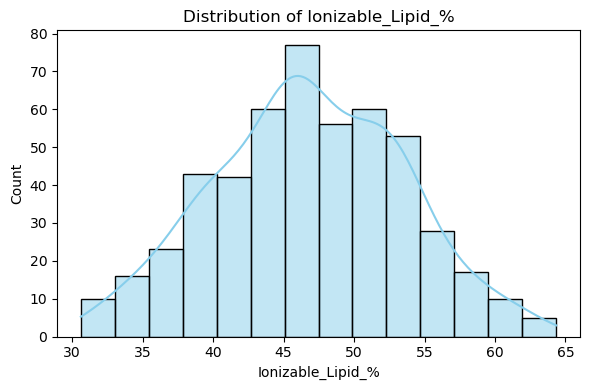

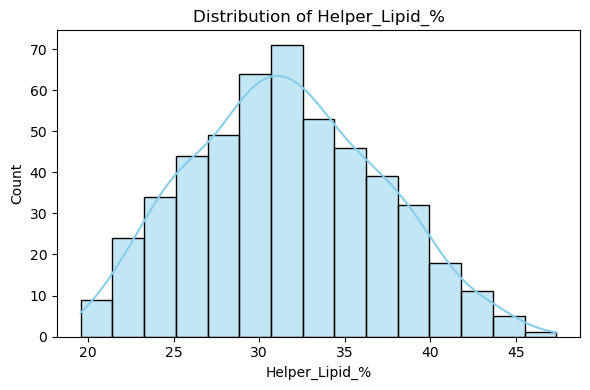

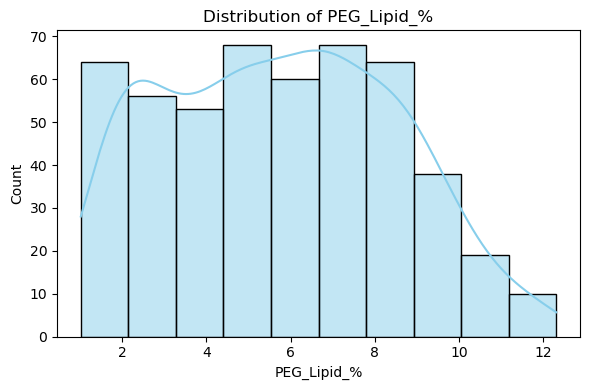

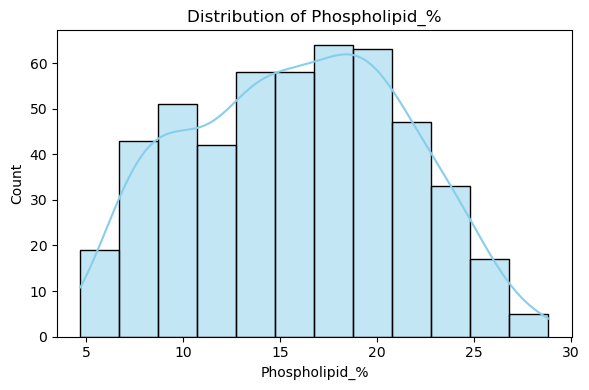

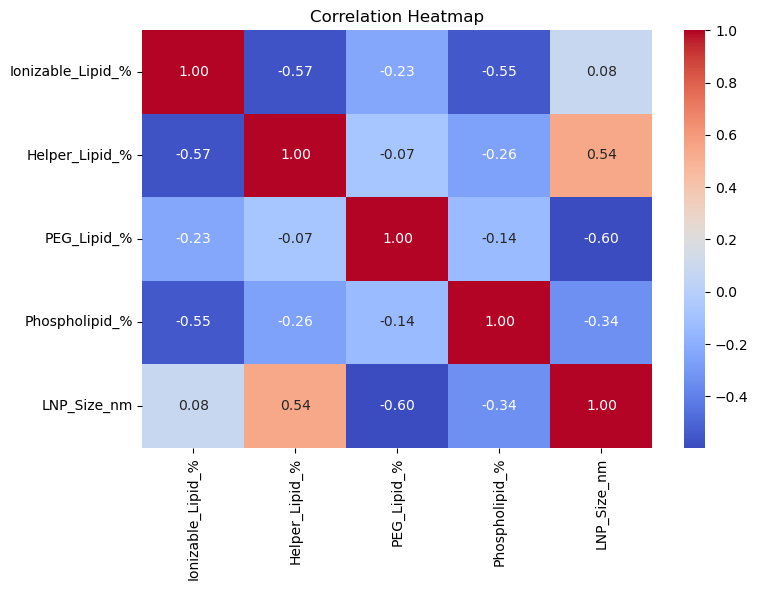

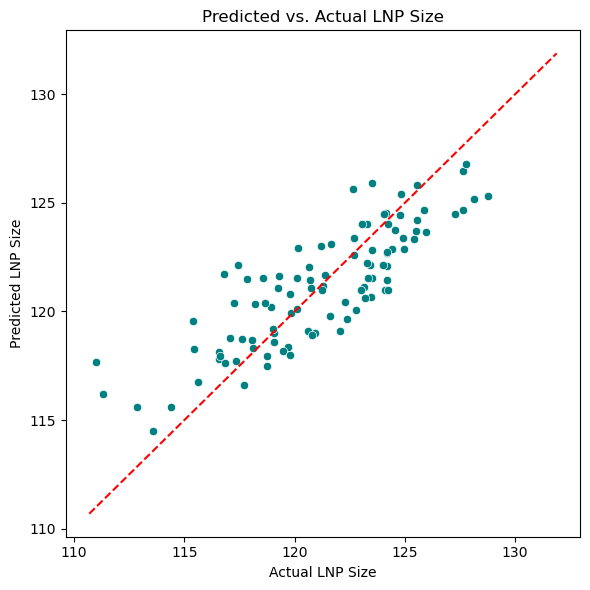

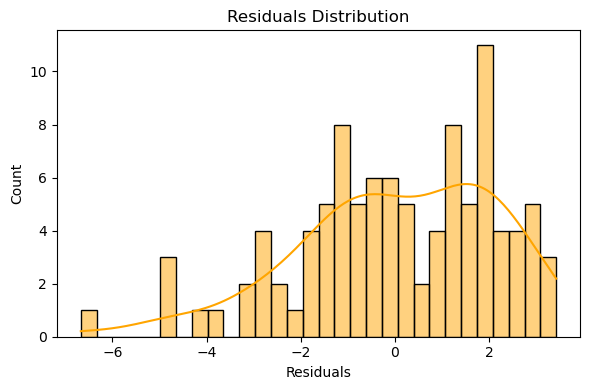

C:\Users\chard\AppData\Local\Temp\ipykernel_11532\3019418335.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


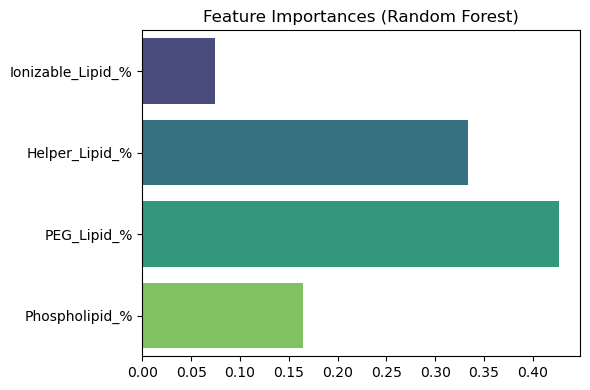

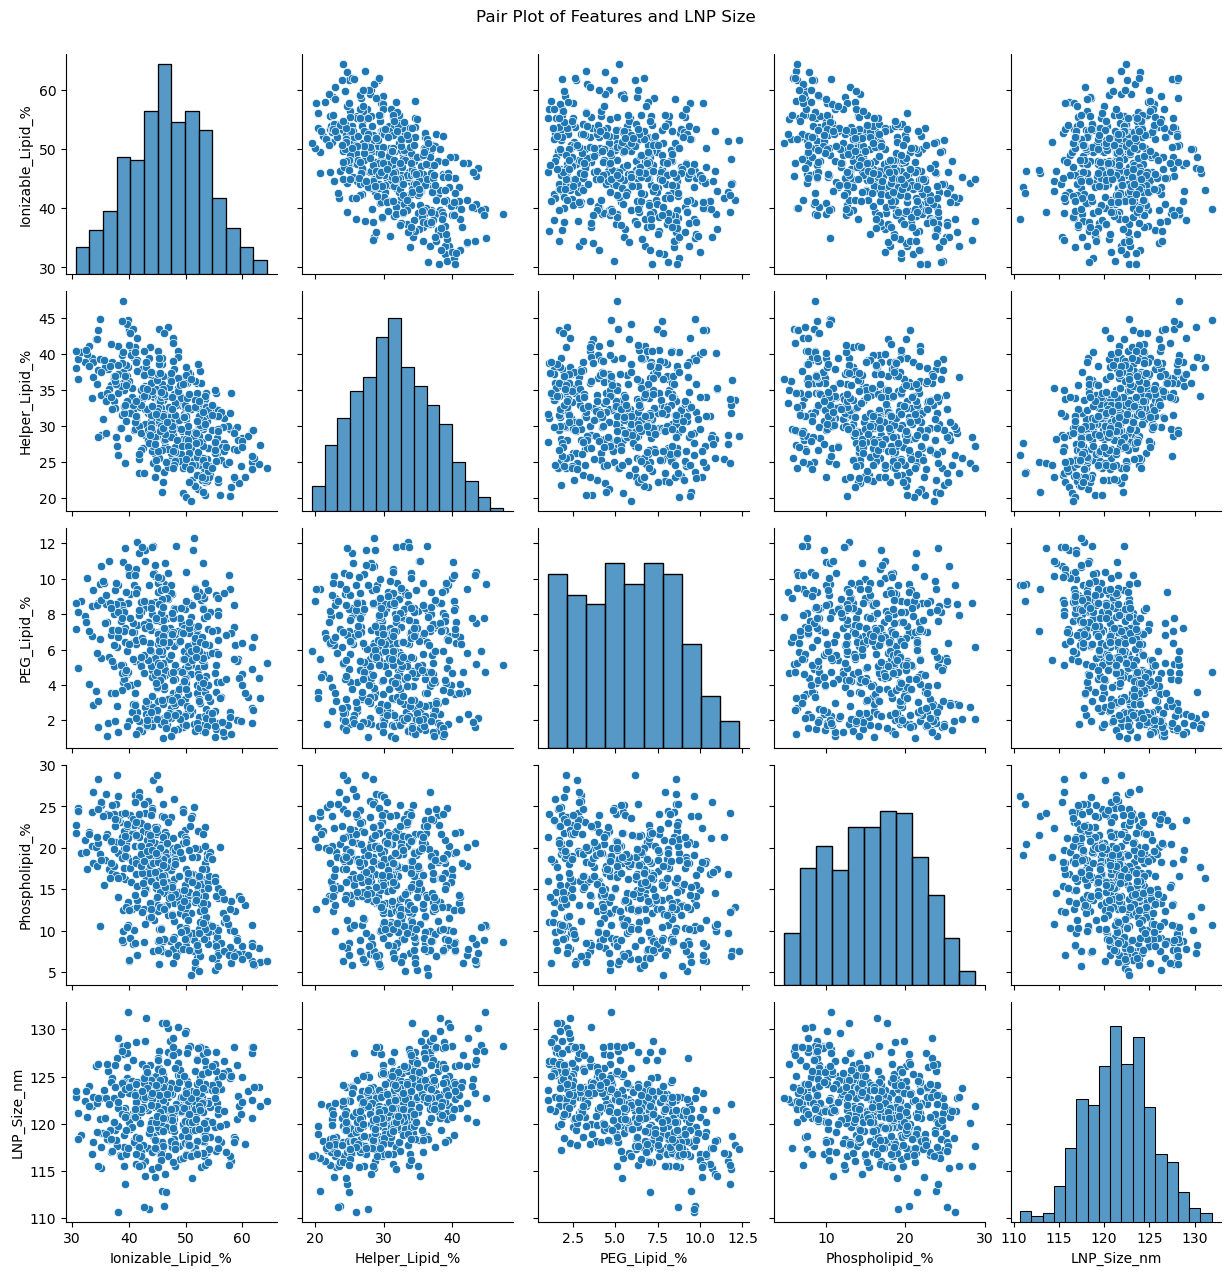

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming df is already loaded, or load it like this:
# df = pd.read_csv("your_data.csv")

# Define correct feature and target names
features = ['Ionizable_Lipid_%', 'Helper_Lipid_%', 'PEG_Lipid_%', 'Phospholipid_%']
target = 'LNP_Size_nm'

# 1. Feature distribution plots
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, color="skyblue")
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

# 2. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 3. Train/test split
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 4. Predicted vs Actual Plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred, color="teal")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual LNP Size")
plt.ylabel("Predicted LNP Size")
plt.title("Predicted vs. Actual LNP Size")
plt.tight_layout()
plt.show()

# 5. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True, color="orange")
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

# 6. Feature Importance Plot
importances = model.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# 7. Pair Plot
pairplot_fig = sns.pairplot(df)
pairplot_fig.fig.suptitle('Pair Plot of Features and LNP Size', y=1.02)
plt.show()
